In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
def identify_pareto(scores):
    size = scores.shape[0]
    ids = np.arange(size)
    pareto_front = np.ones(size, dtype=bool)
    for i in range(size):
        for j in range(size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] >= scores[i]) and any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as dominant
                pareto_front[i] = 0
                break
    # Return ids of pareto front
    return ids[pareto_front]

In [9]:
!ls ../

README.md                X_full_random.csv        b1-b21_random_virial.csv
X_frac_block.csv         b0_random_deltaG.csv     figures
X_frac_random.csv        b0_random_virial.csv     notebooks
X_full_block.csv         b1-b21_random_deltaG.csv


In [14]:
b0_dG = pd.read_csv('../b0_random_deltaG.csv')
b0_A2 = pd.read_csv('../b0_random_virial.csv')

In [18]:
b0_dG.head()

,deltaGmin,system,polymer
0,-14.362045,fe_random_batch0_0,0
1,-13.811065,fe_random_batch0_0,1
2,-14.048944,fe_random_batch0_0,2
3,-13.727992,fe_random_batch0_0,3
4,-14.289432,fe_random_batch0_0,4


In [34]:
b0_A2.head()

,polymer,system,A2_unnormalized,deltaGmin,N,A2_normalized
0,0,fe_virial_batch0,-98.035164,0,24,-0.170200
1,1,fe_virial_batch0,-68.708632,0,24,-0.119286
2,2,fe_virial_batch0,-51.421653,0,24,-0.089274
3,3,fe_virial_batch0,-12.837143,0,24,-0.022287
4,4,fe_virial_batch0,13.578276,0,24,0.023573


In [41]:
response1 = np.array(b0_A2['A2_normalized'])
response2 = -np.array(b0_dG['deltaGmin'])

scores = np.column_stack((response1,response2))
PF_ids = identify_pareto(scores)

Text(0, 0.5, '${\\Delta}G_{ads}$')

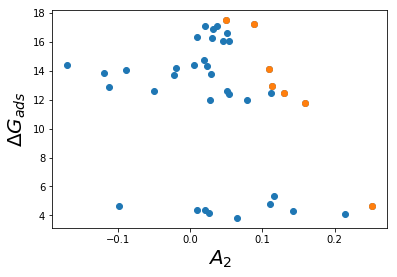

In [42]:
plt.figure()
plt.plot(response1,response2,'o')
plt.plot(response1[PF_ids],response2[PF_ids],'o')
plt.xlabel('$A_2$',size=20)
plt.ylabel('${\Delta}G_{ads}$',size=20)